<a href="https://colab.research.google.com/github/samikshyasanskruti/MachineLearning-Practice-with-Python/blob/main/2_Building_a_Movie_Recommendation_Engine(MLPWP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUILDING MOVIE RECOMMENDATION ENGINE**

**SAMIKSHYA SANSKRUTI**

**REG NO.-2341019634**

# ***Implementing Naive Bayes with scikit-learn***

**1. Define dataset**

In [ ]:
import numpy as np
X_train = np.array([[0,1,1],[0,0,1],[0,0,0],[1,1,0]])
Y_train = ['Y','N','Y','Y']
X_test = np.array([[1,0,1]])

**2. Create Naive-Bayes model from scikit-learn**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=1.0,fit_prior=True) #lambda smoothing term


**3. Train and predict class**

In [ ]:
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)
print('[scikit-learn] Prediction:',pred)

[scikit-learn] Prediction: ['Y']


# ***Building a Movie Recommender with Naive Bayes***

**1. Import data(movies.csv,ratings.csv)**

In [ ]:
import numpy as np
import pandas as pd
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**2. Merge movies and ratings on 'movieId' .**

In [ ]:
df = pd.merge(movies,ratings,on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


**3. Print unique movies and users in this dataset**

In [ ]:
n_users = df['userId'].nunique()
n_movies = df['movieId'].nunique()
n_ratings = df['rating'].nunique()
print(f'Number of users :{n_users}' )
print(f'Number of movies :{n_movies}')
print(f'Number of ratings :{n_ratings}')


Number of users :610
Number of movies :9724
Number of ratings :10


**4.Check which rating is rated by how many users .**

In [ ]:
values,counts=np.unique(df['rating'],return_counts=True)
for value, count in zip(values,counts):
  print(f'Number of rating {value} : {count}')

Number of rating 0.5 : 1370
Number of rating 1.0 : 2811
Number of rating 1.5 : 1791
Number of rating 2.0 : 7551
Number of rating 2.5 : 5550
Number of rating 3.0 : 20047
Number of rating 3.5 : 13136
Number of rating 4.0 : 26818
Number of rating 4.5 : 8551
Number of rating 5.0 : 13211


****

**5. Create a new column "liked" with values 1 if rating is >=4 .**

In [ ]:
df['liked']=(df['rating']>=4).astype(int)
df.head()

,movieId,title,genres,userId,rating,timestamp,liked
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1


**6. Create a dataframe with columns as movieId and index as userId and values are whether the user liked that movie or not(0/1).[use pivot_table]**

In [ ]:
userId_movieId_rating = df.pivot_table(index='userId',columns='movieId',values='liked')
userId_movieId_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Replace NaN values by "0"**

In [ ]:
userId_movieId_rating.fillna(0,inplace=True)
userId_movieId_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**7. Fix a movieId, and consider that movieId column as target and remaining all as features.**

In [ ]:
target_movie = 2858
y = userId_movieId_rating[target_movie]
X = userId_movieId_rating.drop(columns=[target_movie])

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (610, 9723)
Shape of target (y): (610,)


**8. Split the data into train and test set, build the BernoulliNB model, train the model, and
generate the classification report.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score ,classification_report , confusion_matrix

X_train , X_test , Y_train , Y_test = train_test_split (X, y,test_size =0.2, random_state =42)
clf = BernoulliNB ( alpha =1.0, fit_prior = True )
clf .fit ( X_train , Y_train )
pred = clf . predict ( X_test )

print ("Confusion Matrix :\n", confusion_matrix (Y_test , pred ) )
print ("Accuracy :", accuracy_score (Y_test , pred ) )
print ("Classification Report :\n",classification_report ( Y_test , pred ) )

Confusion Matrix :
 [[74  8]
 [16 24]]
Accuracy : 0.8032786885245902
Classification Report :
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        82
         1.0       0.75      0.60      0.67        40

    accuracy                           0.80       122
   macro avg       0.79      0.75      0.76       122
weighted avg       0.80      0.80      0.80       122



**9.Compute True positive rate, False positive rate, AUC, and plot AUC curve**

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt
y_prob = clf.predict_proba ( X_test ) [: , 1] # <-- This gives probabilities for class 1

# Compute ROC metrics
fpr,tpr,thresholds = roc_curve (Y_test , y_prob )
auc_score = roc_auc_score (Y_test , y_prob )

Text(0.5, 1.0, 'ROC Curve for Movie ID 2858')

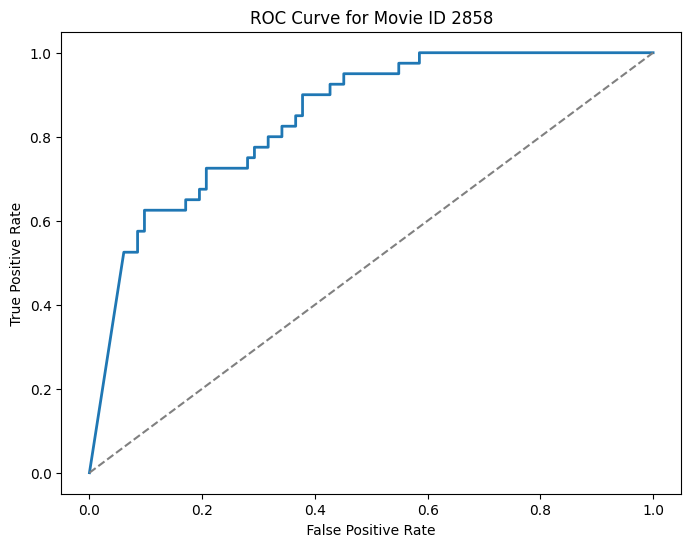

In [ ]:
plt.figure ( figsize =(8,6) )
plt.plot (fpr , tpr , label =f"ROC Curve (AUC = { auc_score :.2f})",linewidth =2)

plt.plot ([0, 1],[0, 1] , linestyle ="--", color ="gray",label =" Random Guess ")
plt.xlabel (" False Positive Rate ")
plt.ylabel (" True Positive Rate ")
plt.title (f"ROC Curve for Movie ID { target_movie }")

**10. For a particular user ID, predict class and find probability for each class.**

In [ ]:
user_id = 1
x_user = userId_movieId_rating . drop ( columns =[ target_movie ]).loc [ user_id ].values.reshape (1, -1)
predicted_preference = clf.predict ( x_user )
predicted_probability = clf.predict_proba ( x_user )
predicted_preference , predicted_probability

(array([1.]), array([[9.11272289e-55, 1.00000000e+00]]))

**11. Define a function which return top k users who have not watch this movie and possible
like it.**

In [ ]:
def recommend_movie ( target_movie , top_k =10) :
  not_watched_user_ids = userId_movieId_rating.index [userId_movieId_rating [ target_movie ] == 0]
  not_watched_users = X.loc[ not_watched_user_ids ]
  not_watched_users_prob =clf.predict_proba(not_watched_users) [: , 1]

  top_k_user_indices =np.argsort(not_watched_users_prob) [- top_k :][:: - 1]
  top_k_user_ids = not_watched_user_ids [ top_k_user_indices ]
  return top_k_user_ids ,not_watched_users_prob [ top_k_user_indices ]

**12. Print movie name and top k users with probability**

In [ ]:
movie_title = movies.loc[movies.movieId == target_movie ,"title"].values[0]

print (f"\nTop users likely to like ’{ movie_title } ’:")
top_users,top_probs =recommend_movie ( target_movie = target_movie , top_k =10)

for user,prob in zip ( top_users , top_probs ) :
  print (f" User ID: { user },Probability of liking :{prob :.4f}")


Top users likely to like ’American Beauty (1999) ’:
 User ID: 610,Probability of liking :1.0000
 User ID: 42,Probability of liking :1.0000
 User ID: 51,Probability of liking :1.0000
 User ID: 561,Probability of liking :1.0000
 User ID: 534,Probability of liking :1.0000
 User ID: 64,Probability of liking :1.0000
 User ID: 573,Probability of liking :1.0000
 User ID: 91,Probability of liking :1.0000
 User ID: 103,Probability of liking :1.0000
 User ID: 462,Probability of liking :1.0000


# ***Cross-validation training and find best parameter***

**Initiate Stratified k-fold cross validation**

In [ ]:
from sklearn . model_selection import StratifiedKFold
alphas = np. logspace ( -2, 1, 10) # 0.01 to 10
cv = StratifiedKFold ( n_splits =5, shuffle =True , random_state =42)

**Calculate and print mean AUC for different alpha**

In [ ]:
alpha_scores =[]
for alpha in alphas :
   clf = BernoulliNB ( alpha =alpha , fit_prior = True )
   fold_scores=[]
   for train_idx , val_idx in cv.split (X, y) :
      X_train , X_val = X.iloc[train_idx],X.iloc[val_idx]
      y_train , y_val = y.iloc[train_idx],y.iloc[val_idx]
      clf .fit ( X_train , y_train )
      y_prob = clf.predict_proba ( X_val ) [: , 1]
      score = roc_auc_score (y_val,y_prob )
      fold_scores.append(score)
   mean_score = np.mean (fold_scores )
   alpha_scores.append ((alpha,mean_score ) )
   print (f" Alpha ={ alpha :.3f} , Mean AUC ={ mean_score :.4f}")

 Alpha =0.010 , Mean AUC =0.8285
 Alpha =0.022 , Mean AUC =0.8276
 Alpha =0.046 , Mean AUC =0.8267
 Alpha =0.100 , Mean AUC =0.8258
 Alpha =0.215 , Mean AUC =0.8253
 Alpha =0.464 , Mean AUC =0.8236
 Alpha =1.000 , Mean AUC =0.8218
 Alpha =2.154 , Mean AUC =0.8190
 Alpha =4.642 , Mean AUC =0.8137
 Alpha =10.000 , Mean AUC =0.8077


**Find best parameter and train final model with best parameter**

In [ ]:
best_alpha,best_score=max( alpha_scores,key=lambda x:x[1])
print (f" Best alpha:{best_alpha :.3f},AUC:{ best_score:.4f}")

 Best alpha : 0.010 , AUC: 0.8285


In [ ]:
best_model=BernoulliNB(alpha=best_alpha)
best_model.fit(X, y)

BernoulliNB(alpha=np.float64(0.01))

**Find best parameter by GridSearchCV,
Explore other parameters of GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": np.logspace(-2, 1, 10) ,"fit_prior":[True ,False ]}
grid_search =GridSearchCV ( BernoulliNB(),param_grid,scoring ="roc_auc",cv=cv)
grid_search.fit(X,y)
best_alpha = grid_search.best_params_["alpha"]
best_fit_prior = grid_search.best_params_["fit_prior"]
best_score = grid_search.best_score_
print (f"\nBest alpha :{best_alpha :.3f},Best fit_prior:{best_fit_prior},AUC:{best_score:.4f}")


Best alpha :0.010,Best fit_prior:True,AUC:0.8285
